# Nonlinear Methods

ใน part ก่อนหน้า เราได้เห็นถึงความสามารถของเทคนิค PCA ในการ transform ข้อมูล รวมถึงความสามารถในการลดมิติลงอย่างมีประสิทธิภาพ แต่ก็ยังมีข้อมูลอีกจำนวนมากที่ไม่เหมาะกับเทคนิค PCA

ตัวอย่างแรก 
--
เราจะลองใช้ PCA กับข้อมูลชุดใหม่ที่ถูกสร้างไว้ตาม code ด้านล่าง


In [1]:
import sys
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(42) # ตั้งค่า random seed เอาไว้ เพื่อให้การรันโค้ดนี้ได้ผลเหมือนเดิม

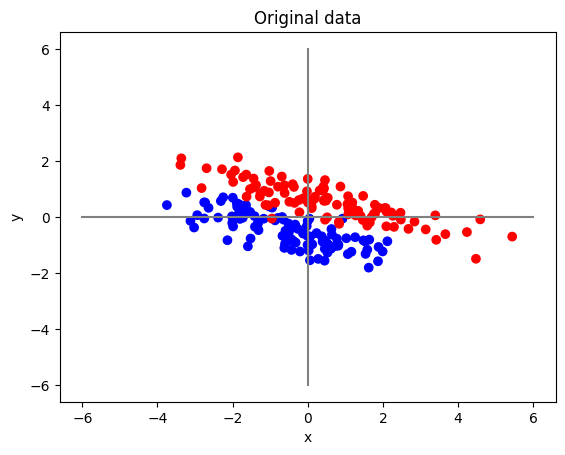

In [2]:
num_points = 100

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 1
data_class1 = multivariate_normal(mean=[-0.5, -0.5], cov=[[3, -1], [-1, 0.5]], size=num_points)

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 2
data_class2 = multivariate_normal(mean=[0.5, 0.5], cov=[[3, -1], [-1, 0.5]], size=num_points)

# รวมข้อมูลจากทั้ง 2 class มาเก็บไว้ในตัวแปร data และเก็บ label (class) เอาไว้ในตัวแปรชื่อ labels
data = np.concatenate((data_class1, data_class2), axis=0)
labels = np.zeros(num_points*2, )
labels[num_points:] = 1

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

# ใช้สีน้ำเงินสำหรับแสดงจุดข้อมูลที่มาจาก class 1 (label=0) และใช้สีแดงสำหรับแสดงจุดข้อมูลที่มาจาก class 2 (label=1)
cmap = colors.ListedColormap(["blue","red"]) 

fig, ax = plt.subplots()

# แสดงรูปข้อมูลเริ่มต้น
ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax.plot([0, 0], y_disp, c="grey") # Plot แกน y
ax.plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax.set(xlabel='x', ylabel='y')
ax.set_title("Original data")
fig.show()

ต่อมาเราจะลองใช้เทคนิค PCA เพื่อลดจำนวนมิติของข้อมูลนี้กัน

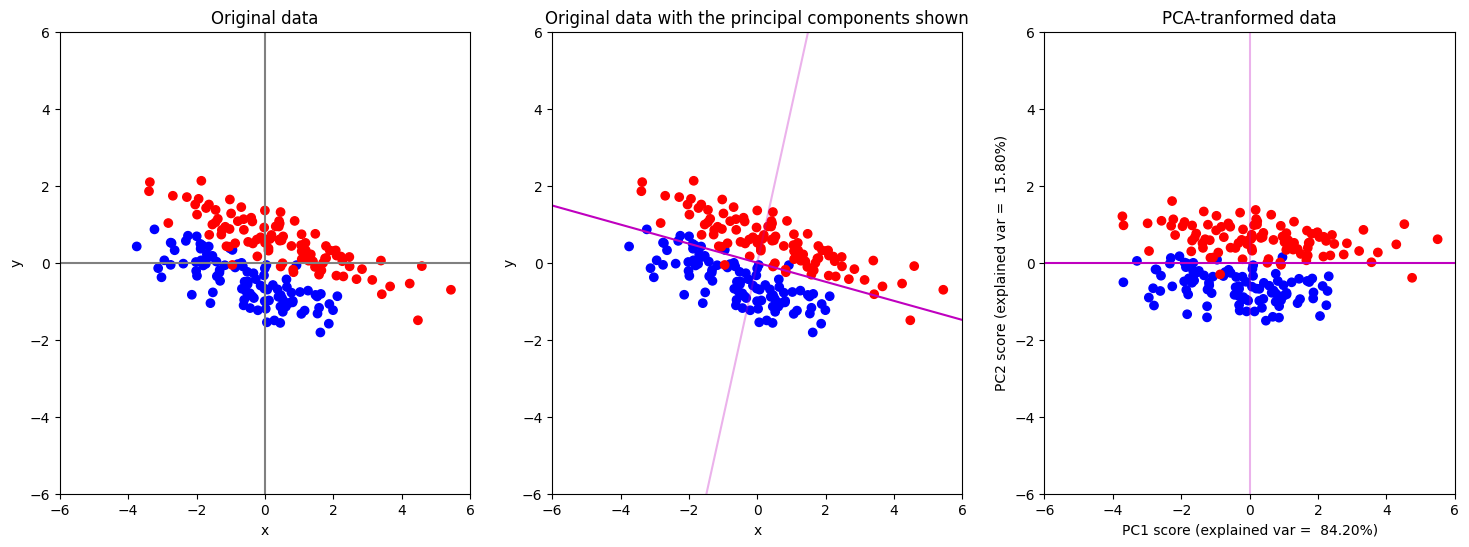

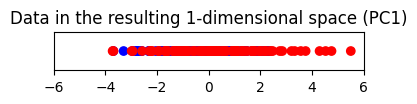

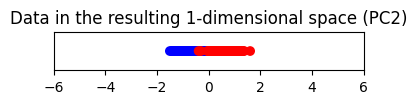

In [3]:
# สร้าง PCA สำหรับตัวอย่างนี้เราจะไม่ whiten ข้อมูลของเรา โดยการกำหนด whiten=False แต่ในการใช้งานจริง การทำ whitening เป็นสิ่งที่ค่อนข้างมีความสำคัญมาก
model_PCA = PCA(n_components=2, whiten=False)

# การทำ PCA เราไม่ใช้ข้อมูลว่าจุดข้อมูลไหนมาจาก class ไหนเลย (หรืออาจมองว่า PCA มองทุกจุดเป็นสีเดียวกันก็ได้)
model_PCA.fit(data)

# ดึงเอา principal component (pc) ออกมา
pc1 = model_PCA.components_[0]
pc2 = model_PCA.components_[1]

# คำนวณหาความชันของเส้นตรงที่วิ่งผ่านจุด (0,0) และว่ิงไปในทิศทางเดียวกับ principal component -> y = m*x
m_pc1 = pc1[1]/pc1[0] 
m_pc2 = pc2[1]/pc2[0]

# คำนวณพิกัดใหม่ของทุกจุดข้อมูล
data_pca = model_PCA.transform(data)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title("Original data")

# แสดงรูปข้อมูลเริ่มต้นโดยมี principal component ทั้ง 2 อันแสดงอยู่ด้วย
ax[1].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[1].plot(x_disp, [m_pc1*x_disp[0], m_pc1*x_disp[1]], c="m", alpha=1) # แสดง pc1 โดยใช้สมการ y = m1*x
ax[1].plot(x_disp, [m_pc2*x_disp[0], m_pc2*x_disp[1]], c="m", alpha=0.3) # แสดง pc2 โดยใช้สมการ y = m2*x
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title("Original data with the principal components shown")

# แสดงข้อมูลหลังถูก transform ด้วย PCA (หน้าตาจะเหมือนกับรูปที่แล้ว แต่มีการหมุนแกน)
ax[2].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
ax[2].plot([0, 0], y_disp, c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน y
ax[2].set(xlabel=f"PC1 score (explained var = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}%)", 
          ylabel=f"PC2 score (explained var = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}%)")
ax[2].set_title("PCA-tranformed data")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()


# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC2 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 0]), c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space (PC1)")
plt.yticks([])

# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC1 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 1], np.zeros_like(data_pca[:, 1]), c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space (PC2)")
plt.yticks([])
plt.show()

In [4]:
print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

% variance captured by PC1 =  84.20
% variance captured by PC2 =  15.80


เทคนิค PCA เลือกแกน PC1 ที่อธิบาย variance ในข้อมูลสูง (มากกว่า 80%) แต่เมื่อลดมิติลงมาแล้วพบว่า PC1 score ของทั้งสอง class มาซ้อนทับกัน

แต่ถ้าเราลดมิติลงโดยการเก็บ PC2 ไว้แทน จะพบว่าข้อมูลจากทั้งสอง class จะแยกออกจากกันได้ดีกว่า

ในข้อมูลชุดนี้จะเห็นได้ว่าแกนที่อธิบาย variance ได้สูงกว่า ก็อาจจะไม่ใช่เป็นแกนที่จะทำให้ข้อมูลจากต่าง class กระจายตัวออกจากกันได้ดีกว่าเสมอไป


ในกรณีที่เราต้องการลดจำนวนมิติโดยต้องการให้ข้อมูลจากต่าง class กระจายตัวออกจากกัน เราอาจจะต้องไปทดลองใช้เทคนิคประเภท supervised learning เช่น linear discriminant analysis (LDA) แทน ซึ่งเทคนิคเหล่านี้สามารถนำเอาข้อมูล labels (ข้อมูลไหนมาจาก class อะไร) มาใช้ในกระบวนการลดจำนวนมิติได้

ตัวอย่างที่ 2
--
เรามาลองดูอีกตัวอย่างหนึ่ง ซึ่งเป็น dataset ที่เป็นรูปภาพตัวเลข 0 ถึง 9

ที่มาของโค้ดสำหรับ download ชุดข้อมูล: https://umap-learn.readthedocs.io/en/latest/basic_usage.html#digits-data

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

ดูตัวอย่างภาพ

Images: (1797, 64)
Labels: (1797,)
There are 1797 samples.
There are 10 classes.


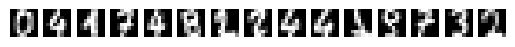

In [6]:
# เอาข้อมูลมาเก็บไว้ใน variables
images_flatten = digits.data
labels = digits.target

num_classes = len(list(set(labels)))

print(f"Images: {images_flatten.shape}")
print(f"Labels: {labels.shape}")
print(f"There are {images_flatten.shape[0]} samples.")
print(f"There are {num_classes} classes.")

# ดูตัวอย่างภาพ
plt.figure()

for count, idx_img in enumerate(range(0,1500,100)):
    plt.subplot(1,15,count+1)
    plt.imshow(np.reshape(images_flatten[idx_img,:], (8,8)))
    plt.axis('off')
    plt.gray()

เรียกใช้ `sklearn.decomposition.PCA` เหมือนในตัวอย่างก่อนหน้า

In [7]:
model_PCA = PCA(n_components=2, whiten=True, random_state=20)

ลดมิติของข้อมูลจาก 64 มิติต่อหนึ่งจุดข้อมูล ลงเหลือ 2 มิติ โดยการใช้ PCA ในที่นี้จะเห็นได้ว่า PCA แปลงข้อมูลโดยไม่ได้ใช้ข้อมูล labels เลย

In [8]:
images_PCA = model_PCA.fit_transform(images_flatten)

print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

% variance captured by PC1 =  14.89
% variance captured by PC2 =  13.62


ลองนำผลลัพธ์ที่ได้มา plot ดูว่าข้อมูลจากแต่ละ class มีการกระจายตัวหรือกระจุกตัวกันอย่างไร โดยในที่นี้เราจะใช้สีที่แตกต่างกันเพื่อแสดงให้ดูว่าข้อมูลจาก class ไหน อยู่บริเวณใดใน space 2 มิติ

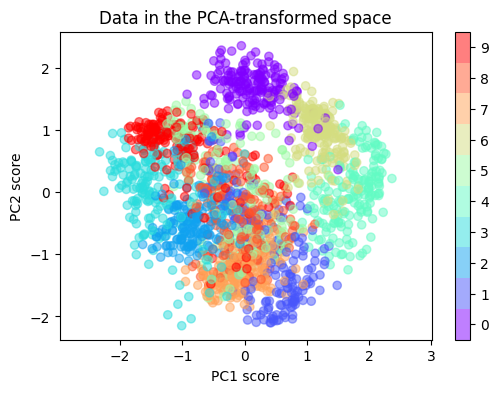

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
sp = ax.scatter(images_PCA[:,0], images_PCA[:,1], c=labels, cmap='rainbow', alpha=0.5)
ax.set_aspect('equal', 'datalim')
ax.set(xlabel='PC1 score', ylabel='PC2 score')
ax.set_title('Data in the PCA-transformed space')
fig.colorbar(sp, ax=ax, boundaries=np.arange(num_classes+1)-0.5).set_ticks(np.arange(num_classes))
plt.show()

ข้อมูลที่ถูกลดจำนวนมิติลงมาเหลือ 2 มิติด้วย PCA มีข้อสังเกตดังนี้


*   ข้อมูลที่มาจาก class เดียวกัน (ตัวเลขเดียวกัน) จะเกาะกลุ่มกัน เช่น กลุ่มของ
ภาพเลข 0 (สีม่วง)

*   ข้อมูลที่มาจากคนละ class มีการกระจายตัวออกจากกันบ้างในบาง class เช่น กลุ่มเลข 0 กลุ่มเลข 6 และ กลุ่มเลข 4 ซ้อนทับกันเพียงเล็กน้อย

*   ข้อมูลจาก class ที่เหลือ ซ้อนทับกันมาก โดยเฉพาะ กลุ่มเลข 5 และเลข 9

**หมายเหตุ** ขอย้ำอีกครั้งว่า PCA ไม่ได้ใช้ข้อมูล labels ในการลดจำนวนมิติเลย


ในส่วนที่เหลือเราจะลองใช้เทคนิคประเภท nonlinear ดูว่าจะสามารถลดจำนวนมิติได้ดีกว่า PCA ซึ่งเป็นเทคนิคประเภท linear สำหรับข้อมูลชุดนี้ได้หรือไม่

เทคนิคประเภท nonlinear มีหลายประเภท เช่น [t-distributed Stochastic Neighbor Embedding (t-SNE)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbcl), [Uniform Manifold Approximation and Projection (UMAP)](https://arxiv.org/abs/1802.03426) และ [PHATE](https://www.nature.com/articles/s41587-019-0336-3) 

สำหรับตัวอย่างนี้เราจะมาลองทดสอบใช้งาน UMAP กัน

In [10]:
# ติดตั้ง UMAP
!{sys.executable} -m pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import `umap` มาใช้งาน

In [11]:
import umap

สร้างและใช้ UMAP ในการลดจำนวนมิติของข้อมูล โดยที่ไม่ได้ใช้ข้อมูล labels สำหรับลดจำนวนมิติลง

**หมายเหตุ** UMAP มี parameters ที่เราต้องลองปรับค่าดู เช่น `n_neighbors`, `min_dist`, `n_components` และ `metric` ซึ่งเราสามารถไปลองศึกษาเพิ่มเติมได้จาก https://umap-learn.readthedocs.io/en/latest/parameters.html#min-dist

In [12]:
model_umap = umap.UMAP(n_components=2, n_neighbors=15, metric='euclidean', min_dist=0.1, random_state=42)

images_UMAP = model_umap.fit_transform(images_flatten)
print(images_UMAP.shape)

(1797, 2)


Plot ผลที่ได้จาก UMAP มาเทียบกับ PCA โดยในที่นี้เราจะใช้สีที่แตกต่างกันเพื่อแสดงให้ดูว่าข้อมูลจาก class ไหน อยู่บริเวณใดใน space 2 มิติ

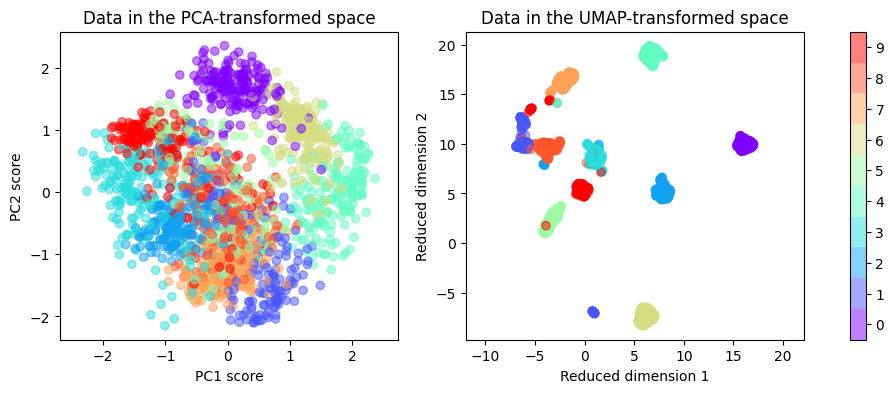

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot ผลของ PCA
ax[0].scatter(images_PCA[:,0], images_PCA[:,1], c=labels, cmap='rainbow', alpha=0.5)
ax[0].set_aspect('equal', 'datalim')
ax[0].set(xlabel='PC1 score', ylabel='PC2 score')
ax[0].set_title('Data in the PCA-transformed space')

# Plot ผลของ UMAP
ax[1].scatter(images_UMAP[:,0], images_UMAP[:,1], c=labels, cmap='rainbow', alpha=0.5)
ax[1].set_aspect('equal', 'datalim')
ax[1].set(xlabel='Reduced dimension 1', ylabel='Reduced dimension 2')
ax[1].set_title('Data in the UMAP-transformed space')

# ใช้สีที่แตกต่างกันสำหรับแสดงจุดข้อมูลในสองมิติ จากคนละ class กัน (มี 10 classes จึงใช้ 10 สี)
fig.colorbar(sp, ax=ax, boundaries=np.arange(num_classes+1)-0.5).set_ticks(np.arange(num_classes))
plt.show()

จะเห็นได้ว่าข้อมูลจากเทคนิค UMAP ส่งผลให้ข้อมูลจาก class เดียวกันเกาะกลุ่มกันได้ ในขณะที่ข้อมูลจากคนละ class (คนละสี) มีการกระจายตัวออกจากกันมากกว่าสิ่งที่ได้รับจาก PCA

ถึงแม้ว่าในตัวอย่างนี้ UMAP จะดูได้ผลที่ดีกว่า PCA แต่ก็ต้องรำลึกไว้เสมอว่าเทคนิคแต่ละเทคนิคก็มีข้อดี/ข้อเสีย และมีสมมติฐานที่แตกต่างกัน บางสถานการณ์อาจจะเหมาะกับเทคนิคประเภทนึงมากกว่าเทคนิคอีกประเภทนึง

เช่น 

*   PCA เป็นเทคนิคที่มีสมมติฐานน้อยมาก และ PCA มักจะเอาข้อมูลที่ correlate กัน ยุบไปรวมกันอยู่บนมิติเดียวกัน ทำให้ PCA มักจะถูกนำไปใช้ในขั้นตอน preprocessing ก่อนที่จะเอาข้อมูลไปใช้วิเคราะห์ด้วยเทคนิคอื่น ๆ ต่อไป

* เนื่องจาก PCA เป็นโมเดลแบบ linear ทำให้เราสามารถตีความข้อมูลจากการดู loadings ได้ แต่ด้วยความเป็น linear เทคนิคนี้ก็จะไม่เหมาะสมกับข้อมูลที่มีความเป็น nonlinear สูงเช่นกัน

*   PCA วัดความห่างของข้อมูลด้วย Euclidean distance ถ้าหากเราต้องการวัดข้อมูลด้วย distance แบบอื่น PCA ก็จะไม่ค่อยเหมาะแล้ว อาจจะต้องไปใช้เทคนิคอื่น ๆ เช่น multi-dimensional scaling (MDS), Generalized MDS, t-SNE และ UMAP


ถ้าหากต้องการศึกษาเพิ่มเติมเกี่ยวกับเทคนิคเหล่านี้เป็นภาษาไทย สามารถเข้าไปดูได้ที่ [MTEC machine learning mini-lecture: Session 2- Principals of unsupervised techniques](https://youtu.be/wq-F-CVDerk) ซึ่งเป็นส่วนนึงของ [MTEC Machine Learning Workshop](https://youtube.com/playlist?list=PLJIJClalm2xOsbu69R_yRG3RPVU3gIQKa)